In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente1/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

1524

In [6]:
with open('dataset/generado/paciente1/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

1524

In [8]:
with open('dataset/generado/paciente1/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

190

In [10]:
with open('dataset/generado/paciente1/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

190

In [12]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

191

In [14]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

191

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/vanilla_dropout.h5')

Epoch 1/50
48/48 [==============================] - 4s 25ms/step - loss: 0.0246 - mae: 0.1235 - mse: 0.0246 - val_loss: 0.0077 - val_mae: 0.0744 - val_mse: 0.0077
Epoch 2/50
48/48 [==============================] - 1s 16ms/step - loss: 0.0148 - mae: 0.0949 - mse: 0.0148 - val_loss: 0.0067 - val_mae: 0.0697 - val_mse: 0.0067
Epoch 3/50
48/48 [==============================] - 1s 17ms/step - loss: 0.0114 - mae: 0.0842 - mse: 0.0114 - val_loss: 0.0063 - val_mae: 0.0682 - val_mse: 0.0063
Epoch 4/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0099 - mae: 0.0787 - mse: 0.0099 - val_loss: 0.0059 - val_mae: 0.0636 - val_mse: 0.0059
Epoch 5/50
48/48 [==============================] - 1s 22ms/step - loss: 0.0101 - mae: 0.0788 - mse: 0.0101 - val_loss: 0.0057 - val_mae: 0.0625 - val_mse: 0.0057
Epoch 6/50
48/48 [==============================] - 1s 25ms/step - loss: 0.0091 - mae: 0.0749 - mse: 0.0091 - val_loss: 0.0055 - val_mae: 0.0605 - val_mse: 0.0055
Epoch 7/50
48/48 [====

6/6 [==============================] - 0s 11ms/step - loss: 0.0051 - mae: 0.0580 - mse: 0.0051
test loss, test acc: [0.005147836171090603, 0.058049388229846954, 0.005147836171090603]


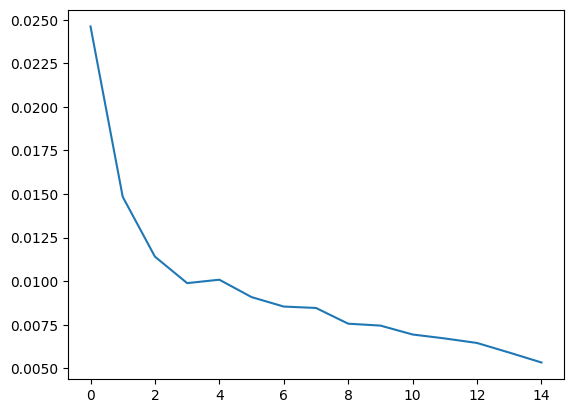

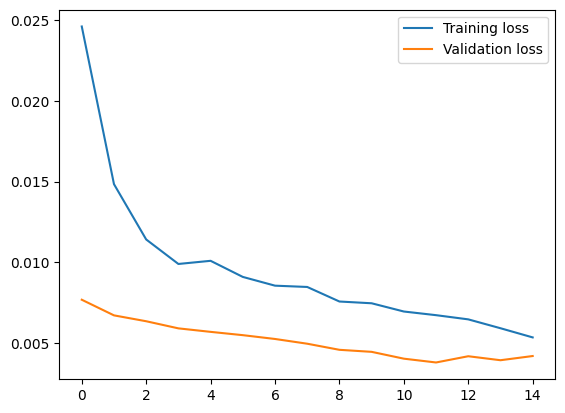

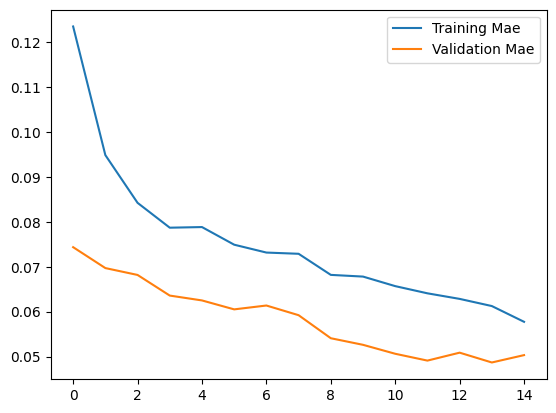

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 0s 8ms/step


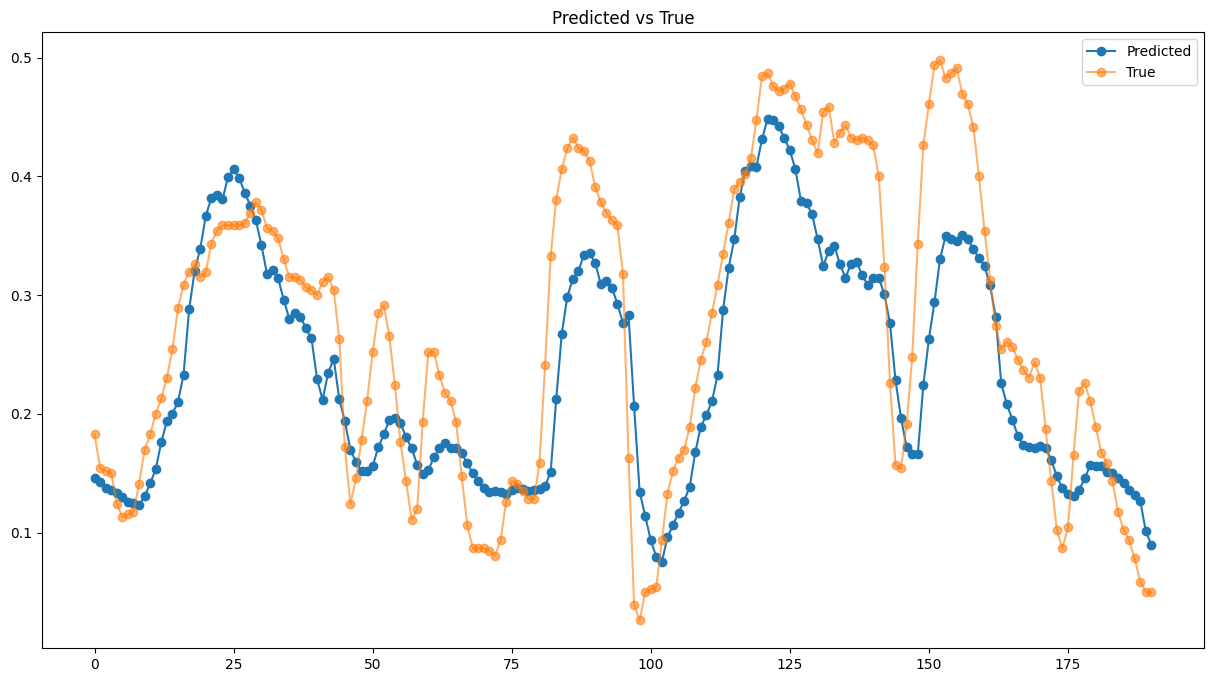

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.05804938969316608,
 'mse': 0.0717484216759316,
 'rmse': 0.005147836012987291}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/vanilla_NO_dropout.h5')

Epoch 1/50
48/48 [==============================] - 3s 23ms/step - loss: 0.0176 - mae: 0.1031 - mse: 0.0176 - val_loss: 0.0072 - val_mae: 0.0711 - val_mse: 0.0072
Epoch 2/50
48/48 [==============================] - 1s 16ms/step - loss: 0.0067 - mae: 0.0653 - mse: 0.0067 - val_loss: 0.0057 - val_mae: 0.0639 - val_mse: 0.0057
Epoch 3/50
48/48 [==============================] - 1s 20ms/step - loss: 0.0058 - mae: 0.0607 - mse: 0.0058 - val_loss: 0.0046 - val_mae: 0.0560 - val_mse: 0.0046
Epoch 4/50
48/48 [==============================] - 1s 19ms/step - loss: 0.0052 - mae: 0.0580 - mse: 0.0052 - val_loss: 0.0040 - val_mae: 0.0510 - val_mse: 0.0040
Epoch 5/50
48/48 [==============================] - 1s 18ms/step - loss: 0.0048 - mae: 0.0556 - mse: 0.0048 - val_loss: 0.0036 - val_mae: 0.0473 - val_mse: 0.0036
Epoch 6/50
48/48 [==============================] - 1s 17ms/step - loss: 0.0044 - mae: 0.0535 - mse: 0.0044 - val_loss: 0.0033 - val_mae: 0.0452 - val_mse: 0.0033
Epoch 7/50
48/48 [====

6/6 [==============================] - 0s 9ms/step - loss: 0.0018 - mae: 0.0327 - mse: 0.0018    
test loss, test acc: [0.0017821554793044925, 0.03265407681465149, 0.0017821554793044925]


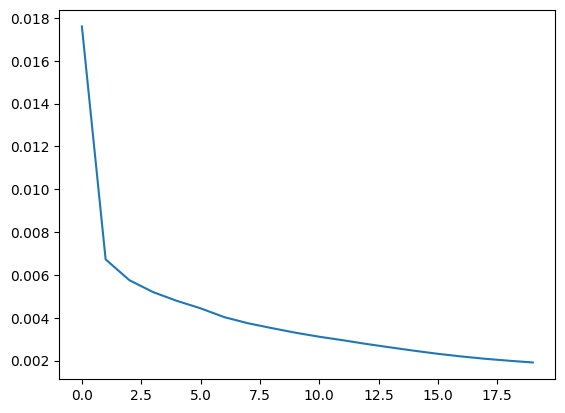

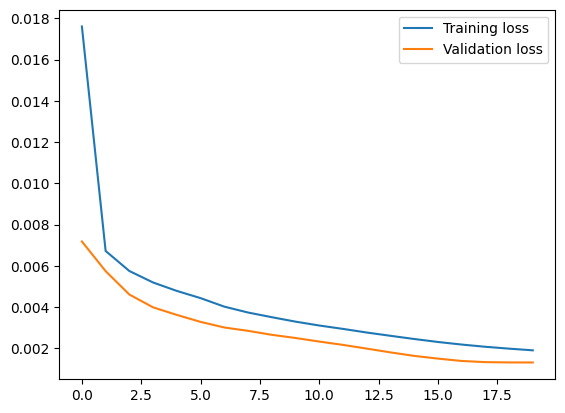

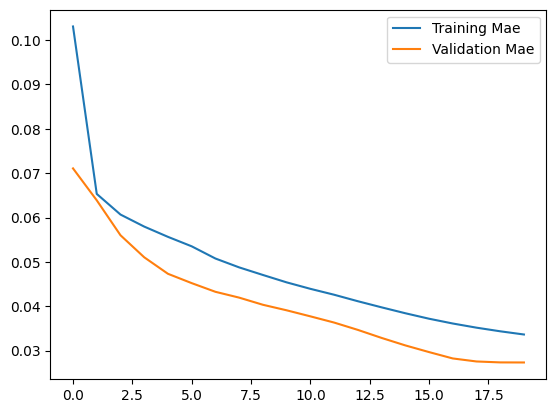

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 0s 5ms/step


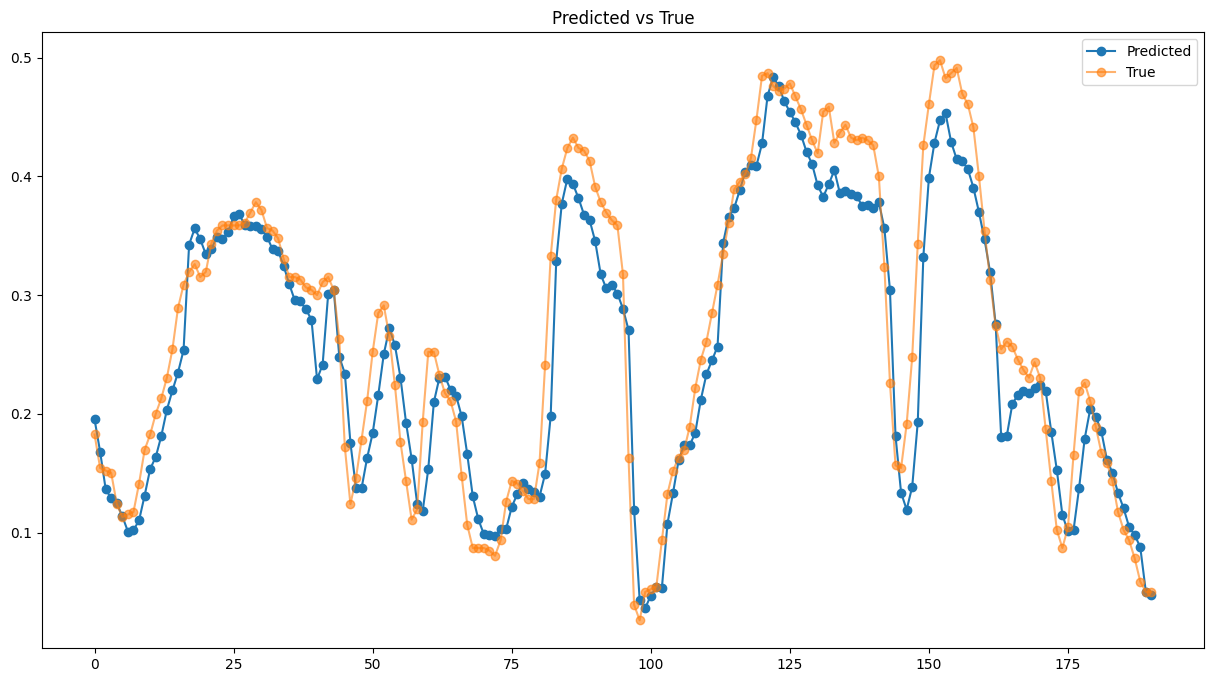

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03265408070326774,
 'mse': 0.042215583739504126,
 'rmse': 0.001782155510467085}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/stacked_dropout.h5')

Epoch 1/50
48/48 [==============================] - 5s 50ms/step - loss: 0.0270 - mae: 0.1285 - mse: 0.0270 - val_loss: 0.0110 - val_mae: 0.0905 - val_mse: 0.0110
Epoch 2/50
48/48 [==============================] - 2s 40ms/step - loss: 0.0146 - mae: 0.0962 - mse: 0.0146 - val_loss: 0.0092 - val_mae: 0.0826 - val_mse: 0.0092
Epoch 3/50
48/48 [==============================] - 2s 36ms/step - loss: 0.0127 - mae: 0.0893 - mse: 0.0127 - val_loss: 0.0085 - val_mae: 0.0784 - val_mse: 0.0085
Epoch 4/50
48/48 [==============================] - 2s 34ms/step - loss: 0.0113 - mae: 0.0839 - mse: 0.0113 - val_loss: 0.0075 - val_mae: 0.0718 - val_mse: 0.0075
Epoch 5/50
48/48 [==============================] - 2s 35ms/step - loss: 0.0107 - mae: 0.0821 - mse: 0.0107 - val_loss: 0.0073 - val_mae: 0.0716 - val_mse: 0.0073
Epoch 6/50
48/48 [==============================] - 2s 35ms/step - loss: 0.0097 - mae: 0.0780 - mse: 0.0097 - val_loss: 0.0064 - val_mae: 0.0666 - val_mse: 0.0064
Epoch 7/50
48/48 [====

6/6 [==============================] - 0s 16ms/step - loss: 0.0045 - mae: 0.0557 - mse: 0.0045
test loss, test acc: [0.0045393784530460835, 0.055724602192640305, 0.0045393784530460835]


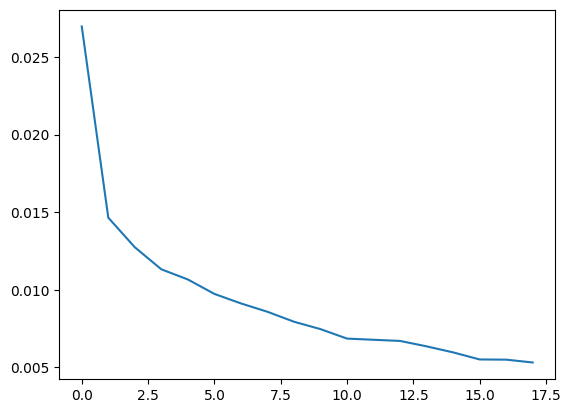

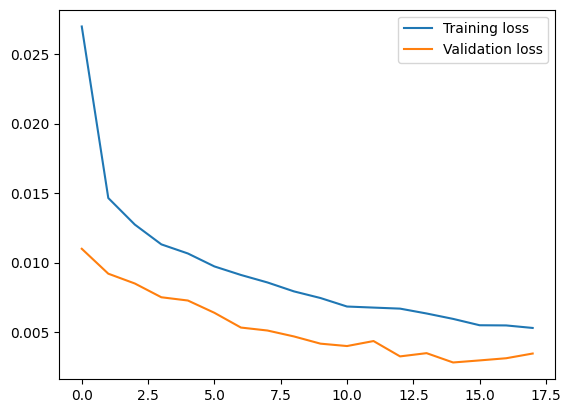

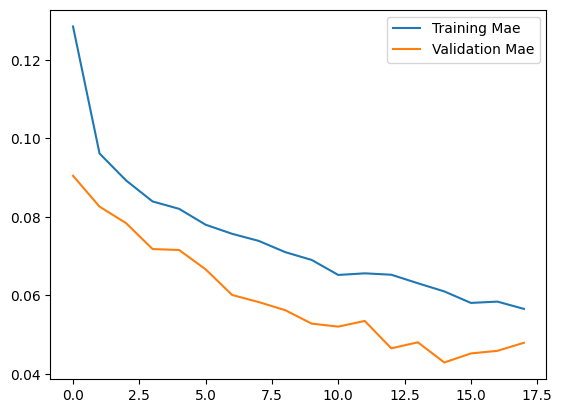

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 11ms/step


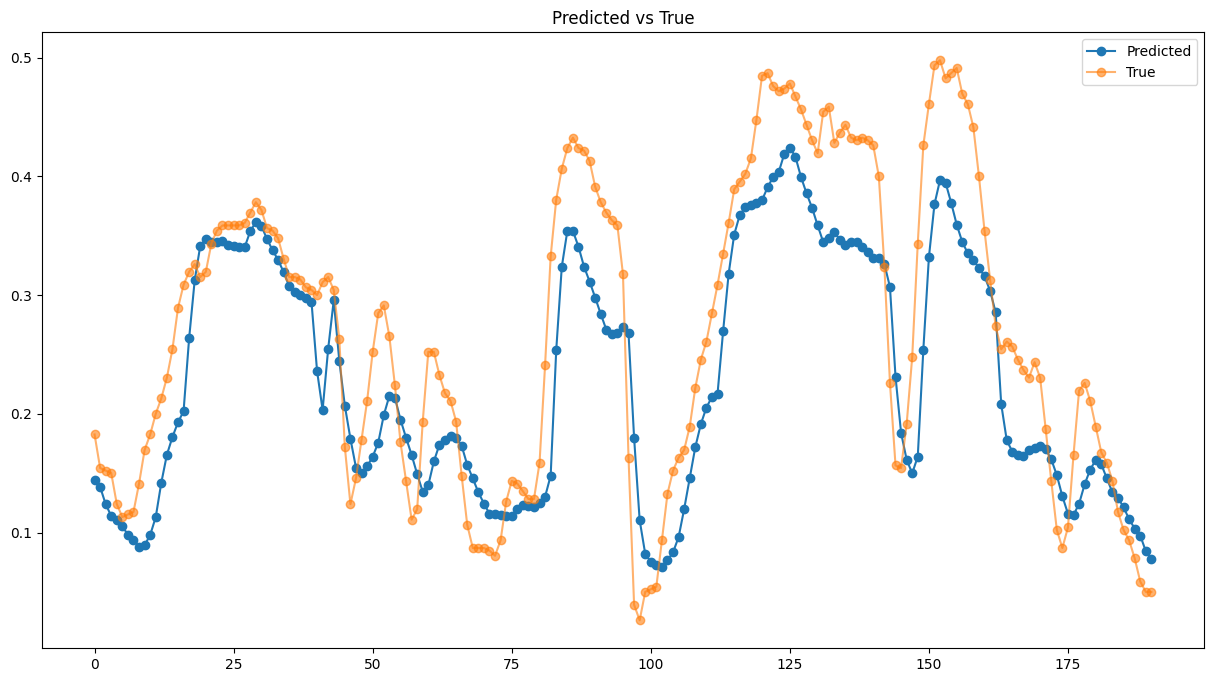

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.055724602411934665,
 'mse': 0.06737491155043564,
 'rmse': 0.004539378706429026}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/stacked_NO_dropout.h5')

Epoch 1/50
48/48 [==============================] - 7s 92ms/step - loss: 0.0262 - mae: 0.1281 - mse: 0.0262 - val_loss: 0.0152 - val_mae: 0.1041 - val_mse: 0.0152
Epoch 2/50
48/48 [==============================] - 3s 60ms/step - loss: 0.0122 - mae: 0.0898 - mse: 0.0122 - val_loss: 0.0091 - val_mae: 0.0804 - val_mse: 0.0091
Epoch 3/50
48/48 [==============================] - 3s 56ms/step - loss: 0.0102 - mae: 0.0813 - mse: 0.0102 - val_loss: 0.0083 - val_mae: 0.0756 - val_mse: 0.0083
Epoch 4/50
48/48 [==============================] - 3s 54ms/step - loss: 0.0092 - mae: 0.0769 - mse: 0.0092 - val_loss: 0.0075 - val_mae: 0.0715 - val_mse: 0.0075
Epoch 5/50
48/48 [==============================] - 2s 52ms/step - loss: 0.0082 - mae: 0.0732 - mse: 0.0082 - val_loss: 0.0067 - val_mae: 0.0660 - val_mse: 0.0067
Epoch 6/50
48/48 [==============================] - 2s 52ms/step - loss: 0.0076 - mae: 0.0703 - mse: 0.0076 - val_loss: 0.0060 - val_mae: 0.0627 - val_mse: 0.0060
Epoch 7/50
48/48 [====

6/6 [==============================] - 0s 17ms/step - loss: 7.8230e-04 - mae: 0.0216 - mse: 7.8230e-04
test loss, test acc: [0.0007822986226528883, 0.02162717841565609, 0.0007822986226528883]


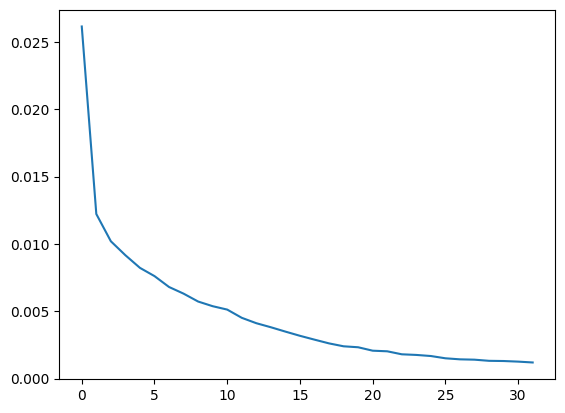

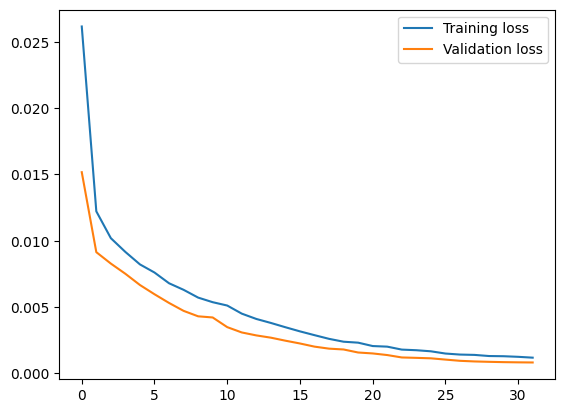

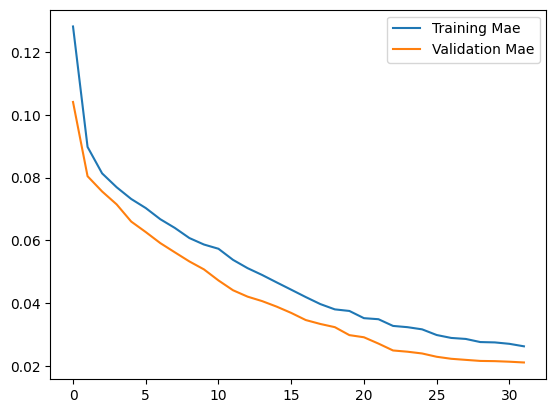

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 16ms/step


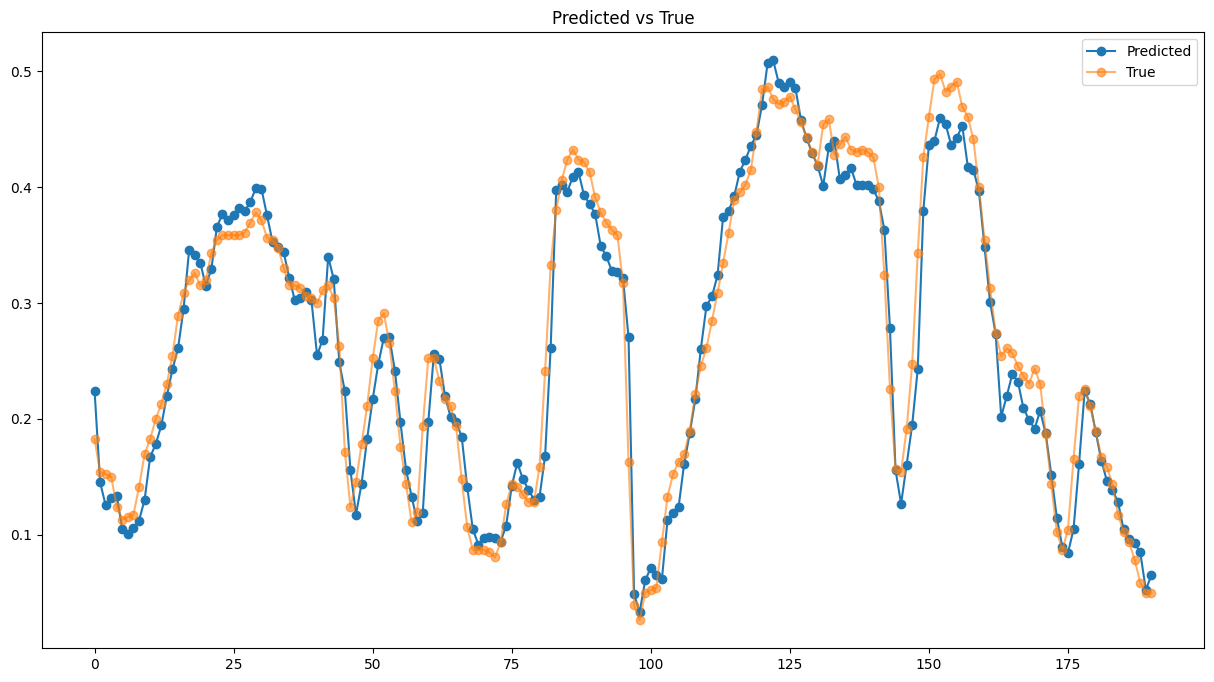

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.021627175826439415,
 'mse': 0.02796959980136309,
 'rmse': 0.0007822985130484104}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/bidirectional_dropout.h5')

Epoch 1/50
48/48 [==============================] - 6s 41ms/step - loss: 0.0219 - mae: 0.1173 - mse: 0.0219 - val_loss: 0.0070 - val_mae: 0.0679 - val_mse: 0.0070
Epoch 2/50
48/48 [==============================] - 1s 31ms/step - loss: 0.0121 - mae: 0.0877 - mse: 0.0121 - val_loss: 0.0055 - val_mae: 0.0597 - val_mse: 0.0055
Epoch 3/50
48/48 [==============================] - 1s 28ms/step - loss: 0.0112 - mae: 0.0838 - mse: 0.0112 - val_loss: 0.0056 - val_mae: 0.0595 - val_mse: 0.0056
Epoch 4/50
48/48 [==============================] - 1s 27ms/step - loss: 0.0090 - mae: 0.0747 - mse: 0.0090 - val_loss: 0.0051 - val_mae: 0.0572 - val_mse: 0.0051
Epoch 5/50
48/48 [==============================] - 1s 28ms/step - loss: 0.0086 - mae: 0.0733 - mse: 0.0086 - val_loss: 0.0047 - val_mae: 0.0547 - val_mse: 0.0047
Epoch 6/50
48/48 [==============================] - 1s 29ms/step - loss: 0.0082 - mae: 0.0714 - mse: 0.0082 - val_loss: 0.0044 - val_mae: 0.0540 - val_mse: 0.0044
Epoch 7/50
48/48 [====

6/6 [==============================] - 0s 12ms/step - loss: 0.0032 - mae: 0.0454 - mse: 0.0032  
test loss, test acc: [0.003195021999999881, 0.04540127515792847, 0.003195021999999881]


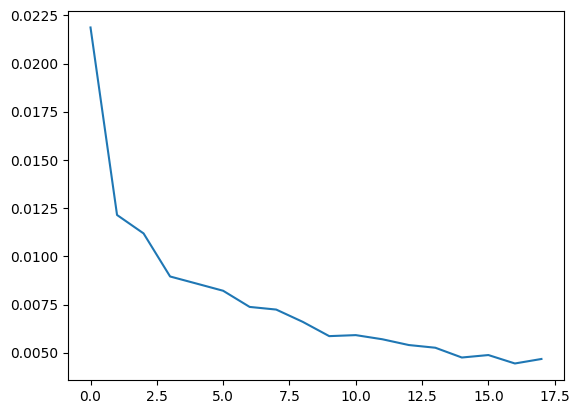

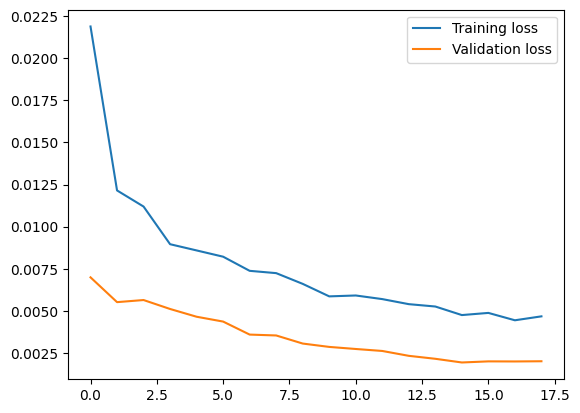

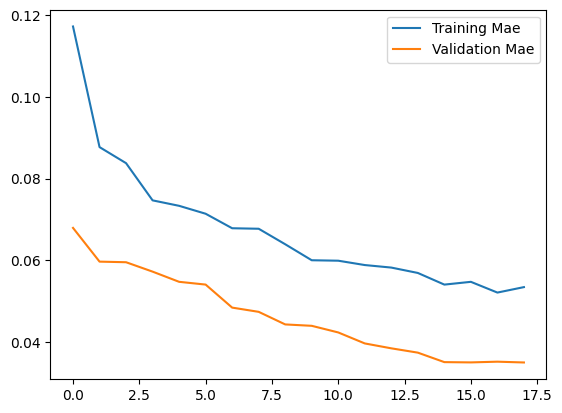

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 2s 12ms/step


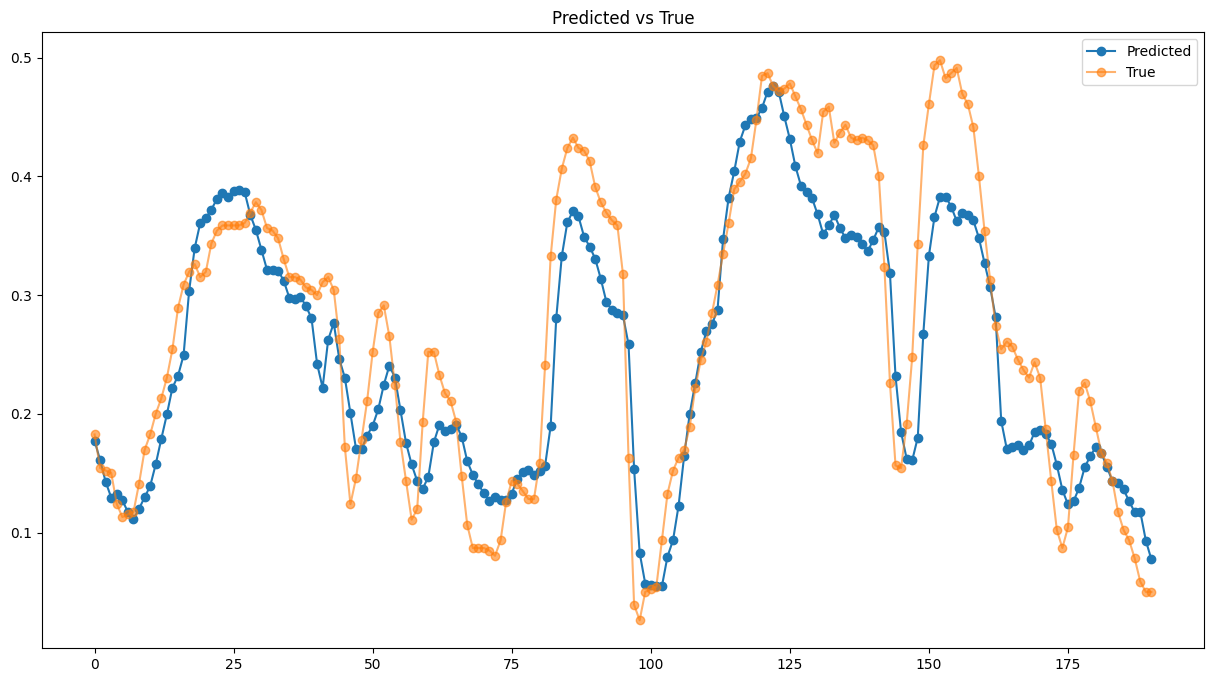

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04540127308828506,
 'mse': 0.05652452701991735,
 'rmse': 0.0031950221548253666}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/bidirectional_NO_dropout.h5')

Epoch 1/50
48/48 [==============================] - 23s 101ms/step - loss: 0.0152 - mae: 0.0997 - mse: 0.0152 - val_loss: 0.0072 - val_mae: 0.0740 - val_mse: 0.0072
Epoch 2/50
48/48 [==============================] - 2s 40ms/step - loss: 0.0070 - mae: 0.0681 - mse: 0.0070 - val_loss: 0.0054 - val_mae: 0.0594 - val_mse: 0.0054
Epoch 3/50
48/48 [==============================] - 2s 41ms/step - loss: 0.0058 - mae: 0.0607 - mse: 0.0058 - val_loss: 0.0050 - val_mae: 0.0569 - val_mse: 0.0050
Epoch 4/50
48/48 [==============================] - 2s 39ms/step - loss: 0.0050 - mae: 0.0561 - mse: 0.0050 - val_loss: 0.0047 - val_mae: 0.0548 - val_mse: 0.0047
Epoch 5/50
48/48 [==============================] - 2s 42ms/step - loss: 0.0046 - mae: 0.0530 - mse: 0.0046 - val_loss: 0.0046 - val_mae: 0.0547 - val_mse: 0.0046
Epoch 6/50
48/48 [==============================] - 2s 49ms/step - loss: 0.0043 - mae: 0.0516 - mse: 0.0043 - val_loss: 0.0037 - val_mae: 0.0484 - val_mse: 0.0037
Epoch 7/50
48/48 [==

6/6 [==============================] - 0s 14ms/step - loss: 0.0017 - mae: 0.0330 - mse: 0.0017  
test loss, test acc: [0.0017054935451596975, 0.03301452100276947, 0.0017054935451596975]


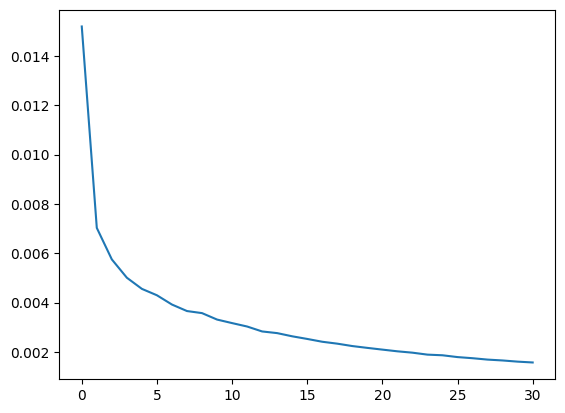

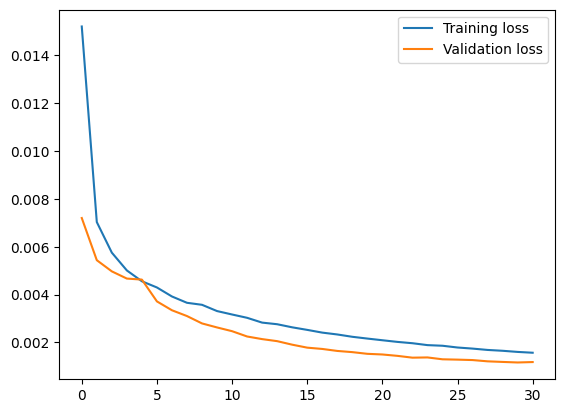

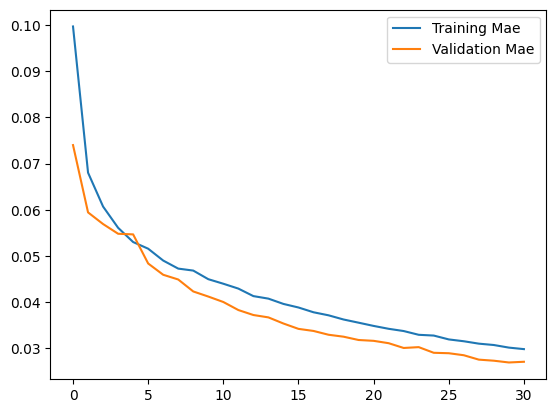

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 2s 12ms/step


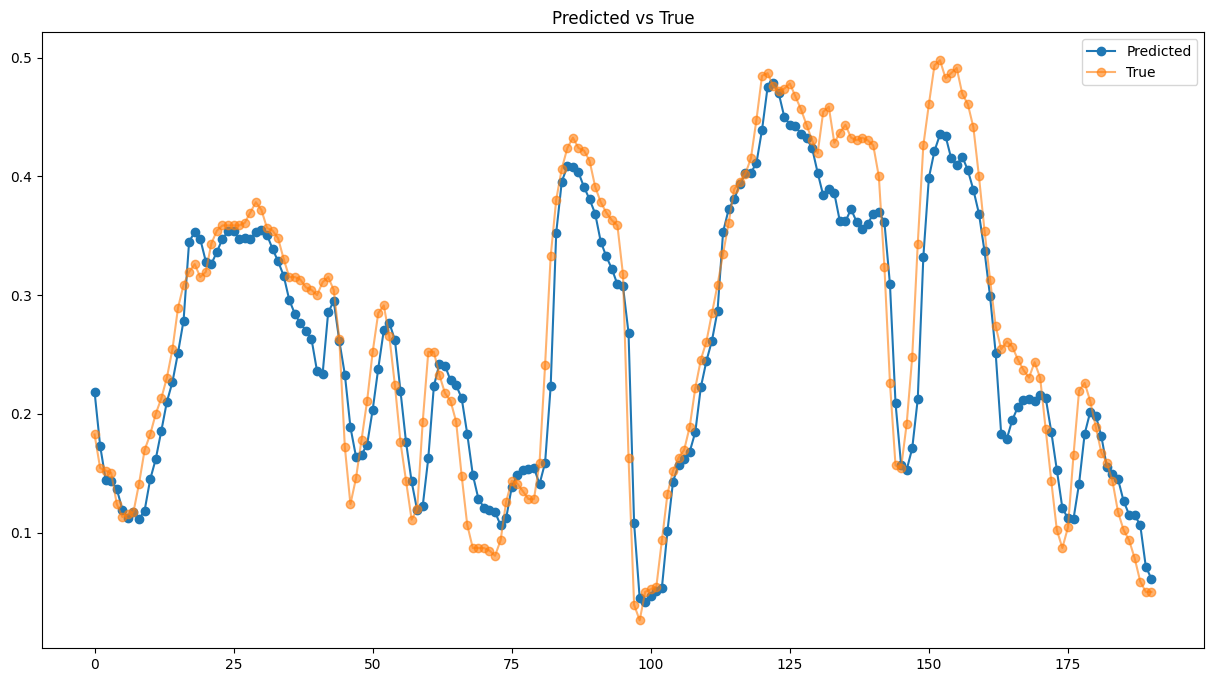

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03301452092763614,
 'mse': 0.04129762124294145,
 'rmse': 0.0017054935203254492}